# Data Science - Week 3 Assighnment 
> Submitted by: Kartikey Mishra - 20BCE100944

![title](HousePrediction.png)

## 1. Download & Load Dataset

In [1]:
import pandas as pd
import numpy as np
# Read the DataFrame 
df = pd.read_csv("Housing.csv")

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [2]:
# Importing Necceasry Libraries of Visualization 
import matplotlib. pyplot as plt
import seaborn as sns

##  Perform Below Visualizations



### a. Univariate Analysis

##### Plotting a Histogram of the Age Distriibuition of all the Passengers Onboarded using Matplotlib using `age` column.

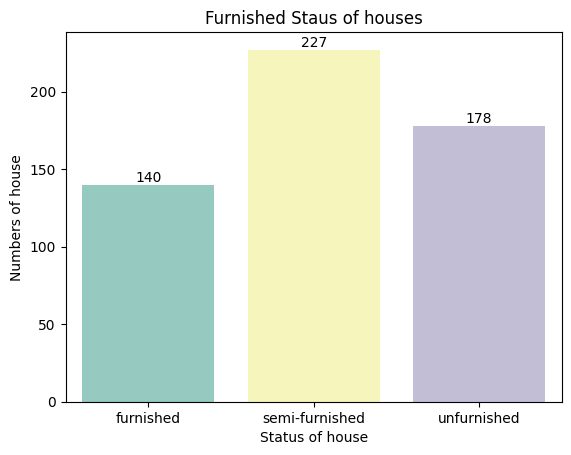

In [3]:
# explore effect of furnishingstatus on House features

ax = sns.countplot(data=df, x='furnishingstatus',palette='Set3')
for label in ax.containers:
    ax.bar_label(label)
ax.set_title('Furnished Staus of houses')
ax.set_xlabel('Status of house')
ax.set_ylabel('Numbers of house')
plt.show()

### b. Bivariate Analysis

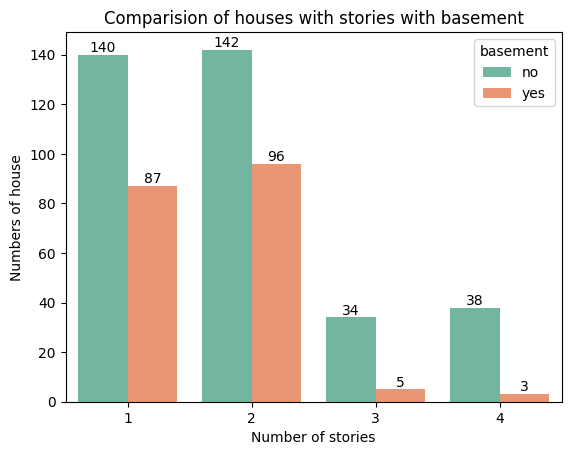

In [4]:
ax = sns.countplot(data=df, x='stories', hue='basement',palette='Set2')
for label in ax.containers:
    ax.bar_label(label)
ax.set_title('Comparision of houses with stories with basement')
ax.set_xlabel('Number of stories')
ax.set_ylabel('Numbers of house')
plt.show()

### c. MultiVariate Analysis

<Axes: >

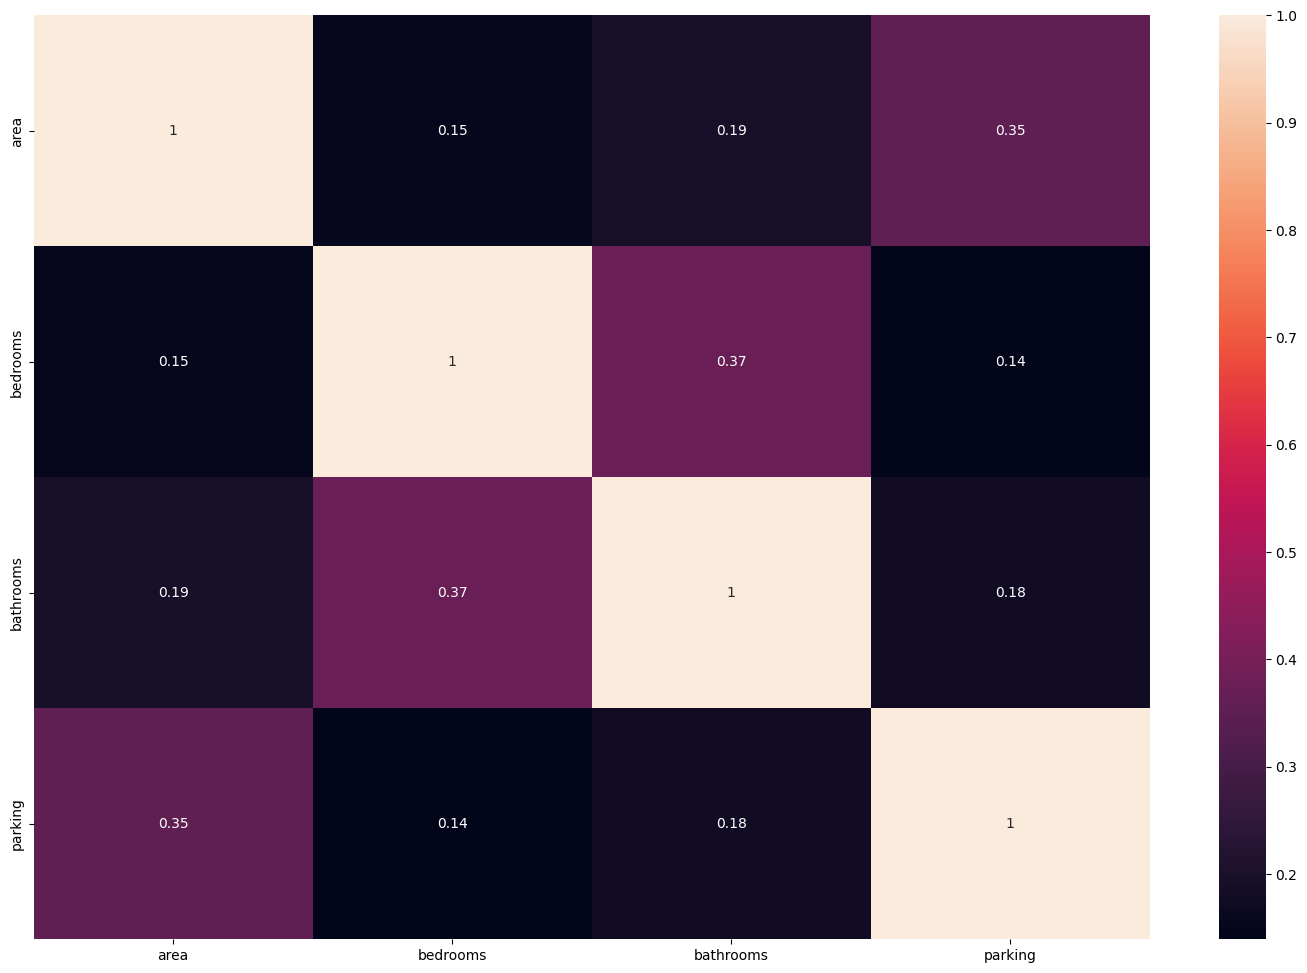

In [5]:
plt.figure(figsize = (18, 12))
cols = ['area', 'bedrooms', 'bathrooms','parking' ]
sns.heatmap(df[cols].corr(), annot = True)

## 4.Perform descriptive statistics on the dataset.


In [6]:
df.shape

(545, 12)

In [7]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  furnishingstatus  545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


## 5.Handle the Missing values

In [9]:
missing_values=df.isnull().sum()
missing_values[missing_values>0]/len(df)*100

Series([], dtype: float64)

As we can see that we don't have any null values , so we don't need handle any null values.

## 6.Find the outliers and replace the outliers

In [10]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


As we can see that `area` has outliers as , it has std > 1. 

In [11]:
Q1 = df['area'].quantile(0.25)
Q3 = df['area'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
Area_outliers = df[(df['area'] < Q1 - whisker_width*IQR) | (df['area'] > Q3 + whisker_width*IQR)]
Area_outliers

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
7,10150000,16200,5,3,2,yes,no,no,no,no,0,unfurnished
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,furnished
56,7343000,11440,4,1,2,yes,no,yes,no,no,1,semi-furnished
64,7000000,11175,3,1,1,yes,no,yes,no,yes,1,furnished
66,6930000,13200,2,1,1,yes,no,yes,yes,no,1,furnished
69,6790000,12090,4,2,2,yes,no,no,no,no,2,furnished
125,5943000,15600,3,1,1,yes,no,no,no,yes,2,semi-furnished
129,5873000,11460,3,1,3,yes,no,no,no,no,2,semi-furnished
186,5110000,11410,2,1,2,yes,no,no,no,no,0,furnished
191,5040000,10700,3,1,2,yes,yes,yes,no,no,0,semi-furnished


<Axes: >

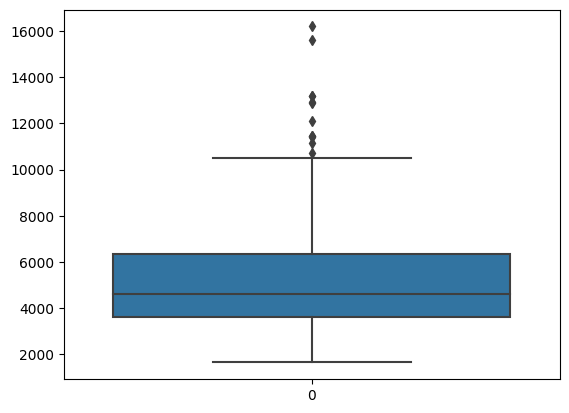

In [12]:
sns.boxplot(df['area'])

Replacing the outlier

In [13]:
# Calculate the median of the column
median = df['area'].median()

# Calculate the median absolute deviation (MAD)
mad = np.abs(df['area'] - median).median()

# Define the outlier threshold
outlier_threshold = 3 * mad

# Replace outliers with the median value
df['area'] = np.where(np.abs(df['area'] - median) > outlier_threshold, median, df['area'])

<Axes: >

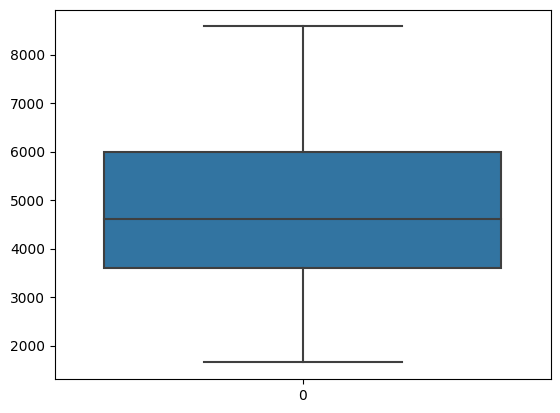

In [14]:
sns.boxplot(df['area'])

> Now we can see that the outlier are fixed

## 7.Check for Categorical columns and perform encoding


In [15]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420.0,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,4600.0,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,4600.0,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500.0,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420.0,4,1,2,yes,yes,yes,no,yes,2,furnished


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    float64
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    int64  
 11  furnishingstatus  545 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 51.2+ KB


By observing above we can see that the categoraical columns are `mainroad`, `guestroom`, `basement`, `hotwaterheating`, `airconditioning` & `furnishingstatus` .

#### Encoding `mainroad`, `guestroom`, `basement`, `hotwaterheating`, `airconditioning` into  : 
- no --> 0 
- yes --> 1 

In [17]:
print('Unique values : ',df['mainroad'].unique())
df.mainroad = df.mainroad.replace({'yes': 1, 'no': 0})
df.head()

Unique values :  ['yes' 'no']


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420.0,4,2,3,1,no,no,no,yes,2,furnished
1,12250000,4600.0,4,4,4,1,no,no,no,yes,3,furnished
2,12250000,4600.0,3,2,2,1,no,yes,no,no,2,semi-furnished
3,12215000,7500.0,4,2,2,1,no,yes,no,yes,3,furnished
4,11410000,7420.0,4,1,2,1,yes,yes,no,yes,2,furnished


In [18]:
print('Unique values : ',df['guestroom'].unique())
df.guestroom = df.guestroom.replace({'yes': 1, 'no': 0})
df.head()

Unique values :  ['no' 'yes']


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420.0,4,2,3,1,0,no,no,yes,2,furnished
1,12250000,4600.0,4,4,4,1,0,no,no,yes,3,furnished
2,12250000,4600.0,3,2,2,1,0,yes,no,no,2,semi-furnished
3,12215000,7500.0,4,2,2,1,0,yes,no,yes,3,furnished
4,11410000,7420.0,4,1,2,1,1,yes,no,yes,2,furnished


In [19]:
print('Unique values : ',df['basement'].unique())
df.basement = df.basement.replace({'yes': 1, 'no': 0})
df.head()

Unique values :  ['no' 'yes']


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420.0,4,2,3,1,0,0,no,yes,2,furnished
1,12250000,4600.0,4,4,4,1,0,0,no,yes,3,furnished
2,12250000,4600.0,3,2,2,1,0,1,no,no,2,semi-furnished
3,12215000,7500.0,4,2,2,1,0,1,no,yes,3,furnished
4,11410000,7420.0,4,1,2,1,1,1,no,yes,2,furnished


In [20]:
print('Unique values : ',df['hotwaterheating'].unique())
df.hotwaterheating = df.hotwaterheating.replace({'yes': 1, 'no': 0})
df.head()

Unique values :  ['no' 'yes']


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420.0,4,2,3,1,0,0,0,yes,2,furnished
1,12250000,4600.0,4,4,4,1,0,0,0,yes,3,furnished
2,12250000,4600.0,3,2,2,1,0,1,0,no,2,semi-furnished
3,12215000,7500.0,4,2,2,1,0,1,0,yes,3,furnished
4,11410000,7420.0,4,1,2,1,1,1,0,yes,2,furnished


In [21]:
print('Unique values : ',df['airconditioning'].unique())
df.airconditioning = df.airconditioning.replace({'yes': 1, 'no': 0})
df.head()

Unique values :  ['yes' 'no']


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420.0,4,2,3,1,0,0,0,1,2,furnished
1,12250000,4600.0,4,4,4,1,0,0,0,1,3,furnished
2,12250000,4600.0,3,2,2,1,0,1,0,0,2,semi-furnished
3,12215000,7500.0,4,2,2,1,0,1,0,1,3,furnished
4,11410000,7420.0,4,1,2,1,1,1,0,1,2,furnished


#### Encoding `furnishingstatus` into  : 
- unfurnished --> 0 
- semi-furnished --> 1 
- furnished --> 2 

In [22]:
print('Unique values : ',df['furnishingstatus'].unique())
df.furnishingstatus = df.furnishingstatus.replace({'furnished': 2,'semi-furnished': 1, 'unfurnished': 0})
df.head()

Unique values :  ['furnished' 'semi-furnished' 'unfurnished']


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420.0,4,2,3,1,0,0,0,1,2,2
1,12250000,4600.0,4,4,4,1,0,0,0,1,3,2
2,12250000,4600.0,3,2,2,1,0,1,0,0,2,1
3,12215000,7500.0,4,2,2,1,0,1,0,1,3,2
4,11410000,7420.0,4,1,2,1,1,1,0,1,2,2


## 8.Split the data into dependent and independent variables

In [23]:
# Creating Independent Variable DataFrame
x = df.iloc[:,1:12]
x.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,7420.0,4,2,3,1,0,0,0,1,2,2
1,4600.0,4,4,4,1,0,0,0,1,3,2
2,4600.0,3,2,2,1,0,1,0,0,2,1
3,7500.0,4,2,2,1,0,1,0,1,3,2
4,7420.0,4,1,2,1,1,1,0,1,2,2


In [24]:
# Creating Dependent Variable DataFrame
y = df.iloc[:,0]
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

## 9.Scaling the Independent Variables

<Axes: >

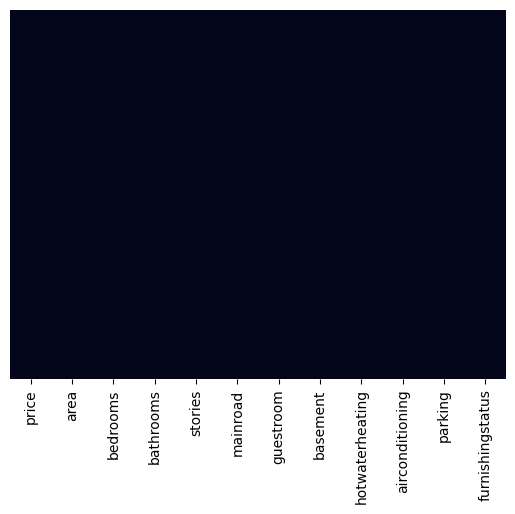

In [25]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

As we can see that there is `no need of scaling` required in the given dataset.

## 10.Split the data into training and testing

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y ,test_size=0.1,random_state = 42)

## 11. Build the Model

In [27]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)


## 12. Train the Model

In [28]:
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

## 13. Test the Model

In [29]:
# Using the forest's predict method on the test data
predictions = rf.predict(X_test)

# Calculating the absolute errors
errors = abs(predictions - y_test)

# Printing out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 1056853.89 degrees.


## 14. Measure the performance using Metrics.

In [30]:
# Calculating mean absolute percentage error (MAPE)
mape = 100 * (errors/ y_test)

accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 74.56 %.
